## CARLIFORNIA HOUSE PRICES

<br>

<img src="image3.jpg" alt="Image description" width="1200" height="1000">

<br>

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional r requirements for it.

**Problem Objective:**
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

## Approach

* Import Libraries
* Data Reading 
* Exploratory Data Analysis
* Feature Engineering
* Train - Test Split
* Preprocessing
* Model Building
* Model Evaluation
* Cross Validation

In [30]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# display configurations
sns.set(font_scale=1.5)

pd.options.display.max_columns=200
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

In [3]:
# load the data frame
df=pd.read_csv(r"C:\Users\Hp\Downloads\1553768847-housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## Data Dictionary




| Column Name         | Data Type                | Description                                                                                         |
|---------------------|--------------------------|-----------------------------------------------------------------------------------------------------|
| `longitude`         | float (signed numeric)    | Longitude value for the block in California, USA                                                     |
| `latitude`          | float (numeric)           | Latitude value for the block in California, USA                                                      |
| `housing_median_age`| int (numeric)             | Median age of the house in the block                                                                 |
| `total_rooms`       | int (numeric)             | Count of the total number of rooms (excluding bedrooms) in all houses in the block                   |
| `total_bedrooms`    | float (numeric)           | Count of the total number of bedrooms in all houses in the block                                     |
| `population`        | int (numeric)             | Count of the total number of population in the block                                                 |
| `households`        | int (numeric)             | Count of the total number of households in the block                                                 |
| `median_income`     | float (numeric)           | Median of the total household income of all the houses in the block                                  |
| `ocean_proximity`   | categorical (numeric)     | Type of the landscape of the block [Unique Values: 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'] |
| `median_house_value`| int (numeric)             | Median of the household prices of all the houses in the block                                        |


## Exploratory Data Analysis

In [4]:
# shape
df.shape

(20640, 10)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
# null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

The dataset contains 207 missing values in the total_bedrooms column. To handle this, we will use median imputation. I prefer using the median over the mean because the median is less sensitive to outliers. Since the mean can be significantly influenced by extreme values, the median provides a more robust estimate for missing data imputation.

In [7]:
# median imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

df['total_bedrooms']=imputer.fit_transform(df[['total_bedrooms']])
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [8]:
# duplicates
df.duplicated().sum()

0

In [9]:
# Descriptive statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Univariate Analysis

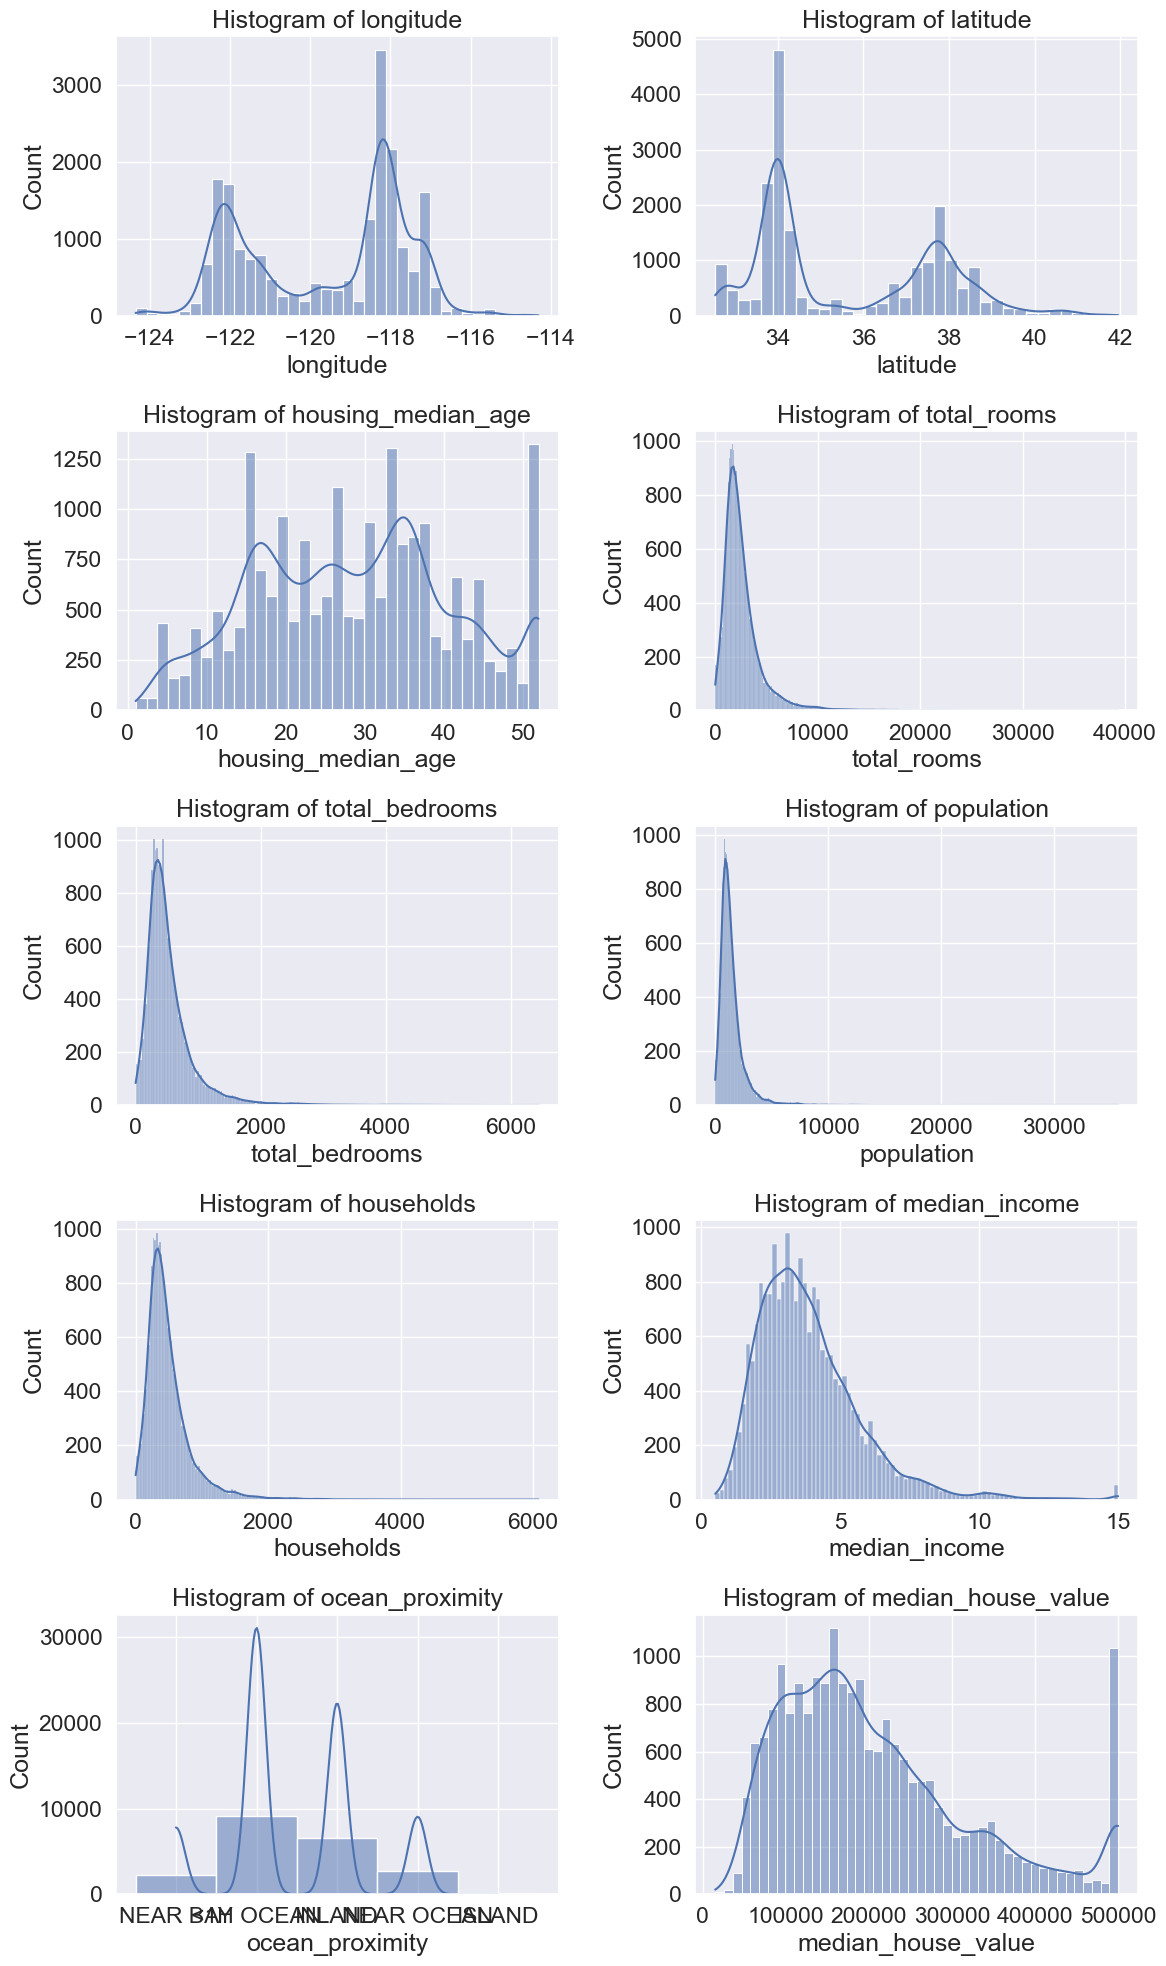

In [10]:
# visualize the distribution of each column
# Set up subplots
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))

# Flatten the axes array for easy indexing
axs = axs.flatten()

# Plot the histograms for each column
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axs[i])
    axs[i].set_title(f"Histogram of {column}")

# Turn off unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### **Insights**

**Longitude and Latitude:**
The data appears to be concentrated in two main geographic clusters, likely representing two distinct regions or urban area.
Longitude shows peaks around -122 and -118, while latitude peaks around 34 and 38.

**Housing Median Age:**
There's a wide distribution of housing ages, with multiple peaks.
The majority of houses seem to be between 20-40 years old, with another significant group around 50 years old.

**Total Rooms:**
Highly right-skewed distribution.
Most houses have fewer than 5,000 total rooms, with a long tail extending to much larger properties.

**Total Bedrooms:**
Similar to total rooms, this is right-skewed.
Most properties have fewer than 1,000 bedrooms, with a peak below 500.

**Population:**
Right-skewed distribution.
Most areas have populations under 5,000, with a few outliers having much larger populations.

**Households:**
Right-skewed, similar to population.
Most areas have fewer than 1,000 households, with some outliers.

**Median Income:**
Roughly normal distribution with a slight right skew.
The majority of median incomes fall between 2 and 6 .

**Ocean Proximity:**
Categorical variable with 5 categories.
"<1H OCEAN" is the most common category, followed by "INLAND".
"ISLAND" is the least common category.

**Median House Value:**
Right-skewed distribution.
Most house values are clustered between 0 and 300,000 (assuming the unit is dollars).
There's a notable spike at the 500,000 mark, which might indicate a cap or grouping of higher values.


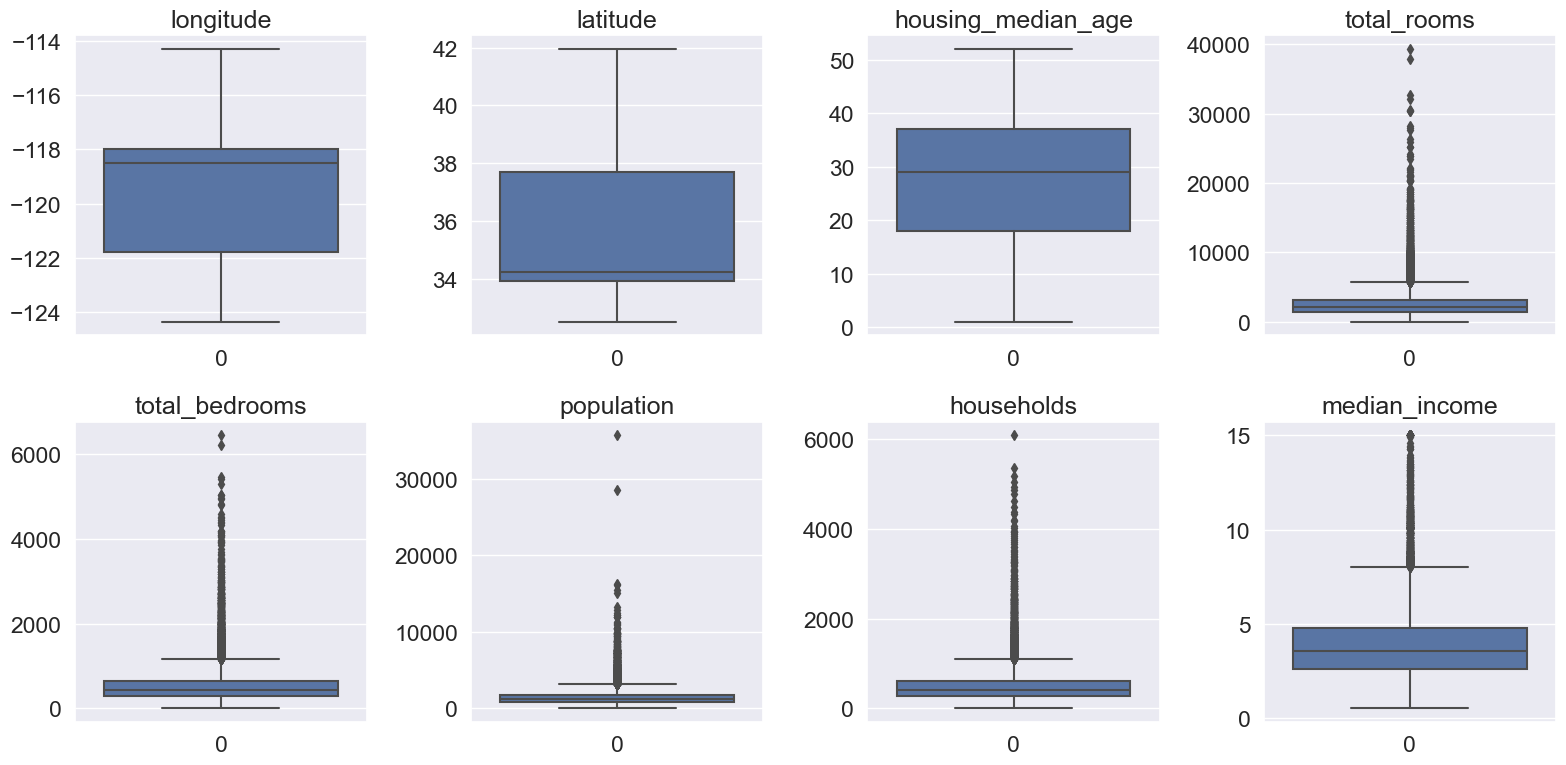

In [11]:
# Boxplot
# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Create a grid of 4 columns and 2 rows
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes array for easy indexing
axs = axs.flatten()


num_plots = min(len(num_cols), len(axs))

for i in range(num_plots):
    col = num_cols[i]
    sns.boxplot(data=df[col], orient="v", ax=axs[i])
    axs[i].set_title(f"{col}")

for j in range(num_plots, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

## Bivariate Analysis

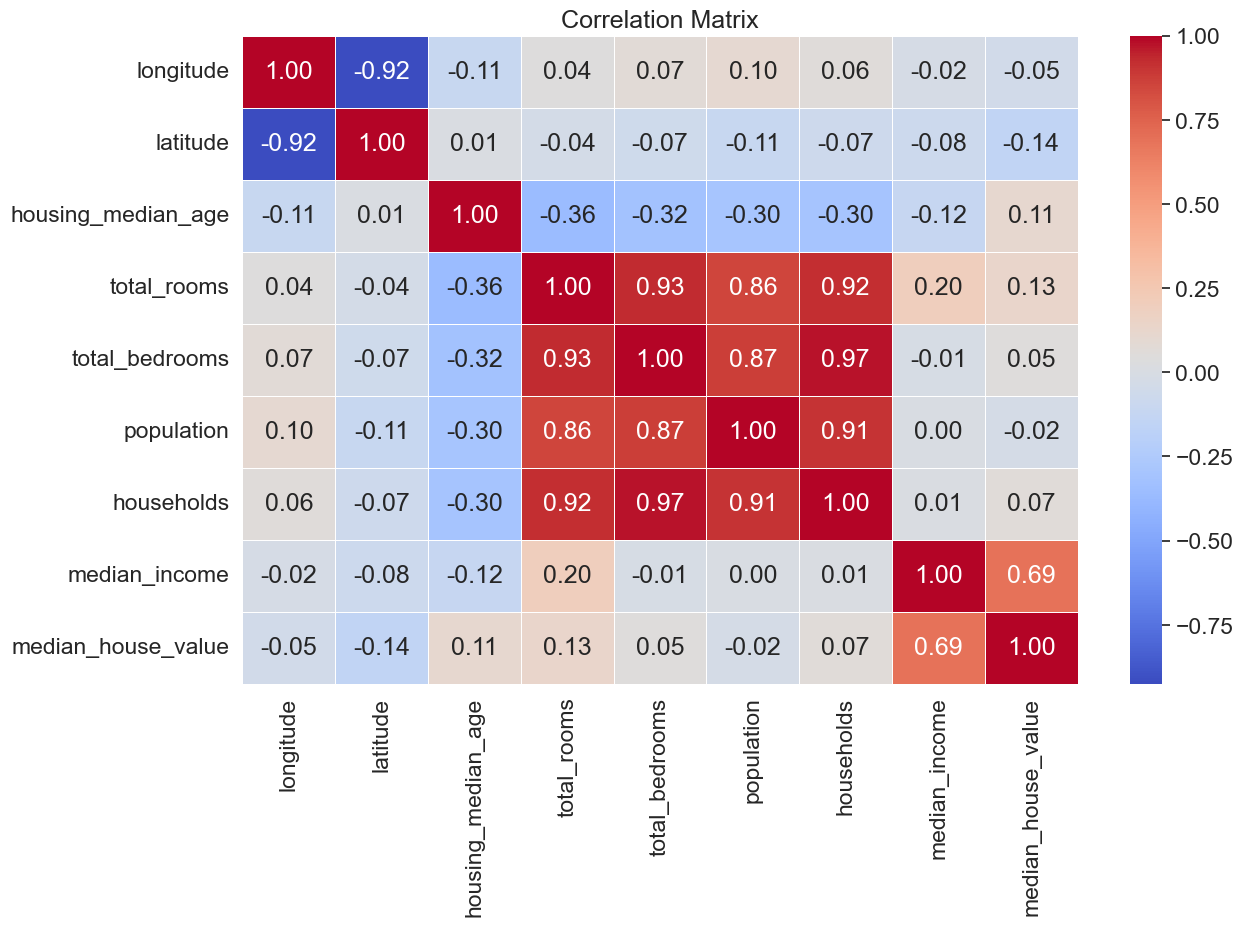

In [12]:
correlation_matrix=df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering

### Clustering Longitude and Latitude 

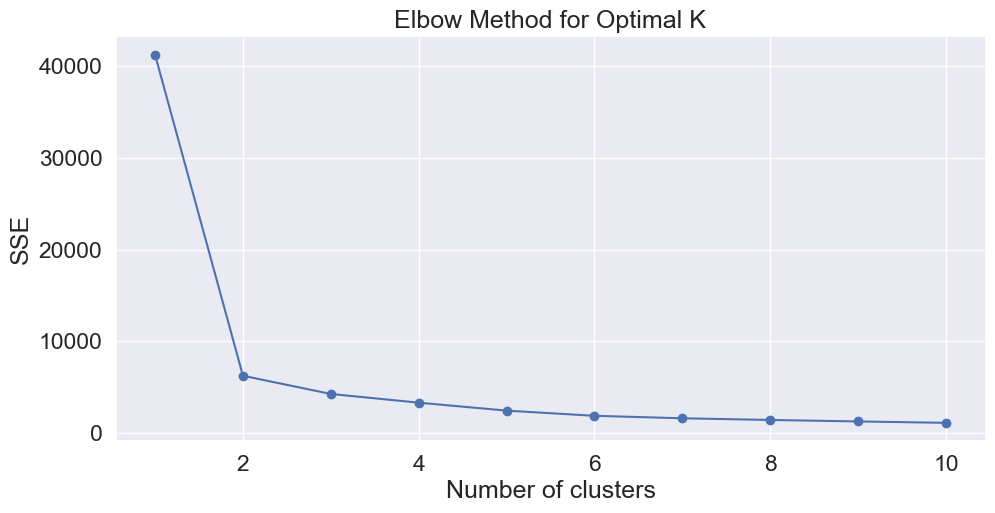

In [13]:
# clustering of Latitude and Longitude column
long_lat_df=df[['longitude','latitude']]
scaler=StandardScaler()
long_lat_scaled=scaler.fit_transform(long_lat_df)

plt.figure(figsize=(10,5))
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(long_lat_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

**Insight:**
The Elbow Method plot shows that 3 clusters is the optimal number according to the "elbow" point, where the decrease in SSE starts to taper off. This indicates that adding more clusters beyond 3 results in diminishing returns in terms of improving the model's fit.

However, after experimenting with different numbers of clusters (3, 4, and 5), I found that 5 clusters provided the best results for my final model. This suggests that while the Elbow Method is a good heuristic, the true optimal number of clusters may depend on other factors, such as the specific structure and complexity of the data, and real-world performance during experimentation.



In [14]:

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['location_cluster'] = kmeans.fit_predict(long_lat_scaled)

In [15]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'location_cluster'],
      dtype='object')

## Train Test Split

In [16]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=47)

## Preprocessing 

In [17]:
categorical_columns=['ocean_proximity','location_cluster']
numerical_columns=['housing_median_age','median_income','total_rooms', 'population', 'households']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns)
    ])
# create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train = pipeline.fit_transform(X_train)
X_test=pipeline.transform(X_test)

In [18]:
# transform back to dataframe

columns = numerical_columns + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns))
X_train = pd.DataFrame(X_train, columns=columns)
X_test=pd.DataFrame(X_test, columns=columns)
X_train.head()

,housing_median_age,median_income,total_rooms,population,households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,location_cluster_0,location_cluster_1,location_cluster_2,location_cluster_3,location_cluster_4
0,-1.562172,-0.364751,-0.768710,-0.749814,-0.909508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.005349,-0.258200,-0.024404,-0.265597,0.594078,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.267389,-0.109336,-0.636950,-0.829760,-0.845639,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.585573,-0.077904,-0.568733,-0.380973,-0.576856,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.005349,-0.683188,0.156884,0.121414,0.791008,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
# rename column
X_train.rename(columns={'ocean_proximity_<1H OCEAN':'ocean_proximity_1H OCEAN'},inplace=True)
X_test.rename(columns={'ocean_proximity_<1H OCEAN':'ocean_proximity_1H OCEAN'},inplace=True)

## Building Models

In [20]:
# XGB Regressor
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
# KNeighborsRegressor
KN_model = KNeighborsRegressor(n_neighbors=5)
KN_model.fit(X_train, y_train)

KNeighborsRegressor()

In [22]:
# Support Vector Regressor
SV_model = SVR(kernel='linear')
SV_model.fit(X_train, y_train)

SVR(kernel='linear')

In [23]:
# RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=100)
RF_model.fit(X_train, y_train)

RandomForestRegressor()

## Model Evaluation

In [24]:
def evaluate_model(model):
    y_pred=model.predict(X_test)
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    # Print evaluation metrics
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    return rmse, mae, r2

In [25]:
models=[RF_model,KN_model,xgb_model]
for model in models:
    print(model)
    evaluate_model(model)
    print('='*30)
    

RandomForestRegressor()
Root Mean Square Error (RMSE): 60075.5601
Mean Absolute Error (MAE): 41268.3003
R-squared (R²): 0.7352
KNeighborsRegressor()
Root Mean Square Error (RMSE): 63482.5526
Mean Absolute Error (MAE): 43106.4776
R-squared (R²): 0.7043
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R

In [26]:
RF_model = RandomForestRegressor(n_estimators=300)
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [27]:
evaluate_model(RF_model)

Root Mean Square Error (RMSE): 59960.0089
Mean Absolute Error (MAE): 41249.1408
R-squared (R²): 0.7362


(59960.008865397984, 41249.14084786822, 0.7362033812886299)

In [28]:
xgb_model = xgb.XGBRegressor(n_estimators=50)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
evaluate_model(xgb_model)

Root Mean Square Error (RMSE): 58575.5471
Mean Absolute Error (MAE): 40445.2256
R-squared (R²): 0.7482


(58575.547092002664, 40445.22561905735, 0.7482447389860081)

## Model Cross Validation

In [31]:
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Convert negative RMSE to positive
rmse_scores = -cv_scores

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Cross-validated RMSE: Mean = {mean_rmse:.4f}, Std = {std_rmse:.4f}")


Cross-validated RMSE: Mean = 58779.2151, Std = 1288.3531


## Conclusion

In this project, we aimed to predict median housing prices across California using a comprehensive dataset provided by the US Census Bureau. Our approach involved several key steps:

**Data Preparation:** We began by loading and inspecting the dataset. We handled missing values using median imputation for the total_bedrooms column, ensuring our data was complete for analysis.

**Exploratory Data Analysis (EDA):** EDA provided valuable insights into the dataset. We observed geographical clusters in longitude and latitude, a right-skewed distribution in several features like total_rooms and median_house_value, and identified significant variations in ocean_proximity categories.

**Feature Engineering:** To enhance the model's predictive power, we created a location_cluster feature using KMeans clustering based on longitude and latitude. This additional feature was incorporated into the model to capture geographical variations in housing prices.

**Preprocessing:** We standardized numerical features and one-hot encoded categorical variables. This step was crucial for ensuring that all features contributed equally to the model's training process.

**Model Building and Evaluation:** We trained several regression models, including XGBoost, RandomForest, and KNN. The XGBoost model achieved the highest performance with an R² score of 0.74 and a mean squared error of 58779 on the test set. This indicated a strong ability of the model to generalize and predict median house prices effectively.


### Summary of Findings:

- The median_income and total_rooms features were found to be highly influential in predicting housing prices.
- Geographic clustering provided additional context that improved model performance.
- The models demonstrated robust performance, with XGBoost being the most effective.

### Future Work:

- Feature Expansion: Incorporating additional features such as economic indicators or local amenities could further enhance the model.
- Hyperparameter Tuning: Further tuning of hyperparameters for the selected models could potentially improve performance.
- Deployment: Developing a user-friendly application for stakeholders to interact with the model and predict housing prices based on new data.